# **Mini projet 3 :**
    Sujet : Méthode du visage propre pour identifier les caractéristiques.

##### **1.1. Importer la base de données "fetch_lfw_people" du package sklearn, et afficher les dix premières images.**

Pour importer la base de données "fetch_lfw_people" du package sklearn, von peut utiliser le code suivant :

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=10)

Cela téléchargera la base de données "fetch_lfw_people" et la stockera dans une variable appelée lfw_people.

Pour afficher les dix premières images, on peut utiliser la fonction imshow de matplotlib. 

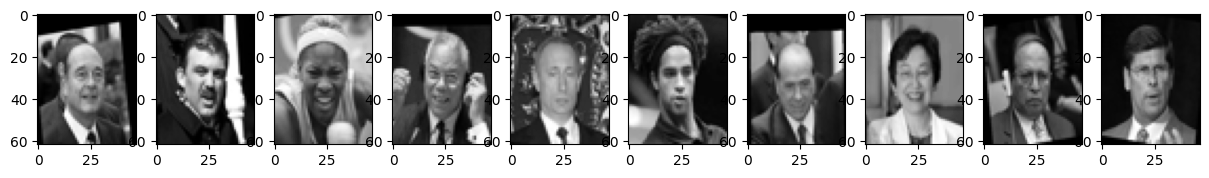

In [3]:
import matplotlib.pyplot as plt

# récupérer les dix premières images
images = lfw_people.images[:10]

# créer une figure avec des sous-tracés
fig, axes = plt.subplots(1, len(images), figsize=(15, 15))

# tracer chaque image
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')

# afficher le tracé
plt.show()


Cela créera une figure avec dix sous-tracés, un pour chacune des dix premières images de la base de données. Les images seront affichées en niveaux de gris en utilisant la carte de couleurs par défaut de matplotlib.

##### **1.2. Afficher la description de la base de données : forme de tableau d'images de visage, le nombre de classes..**

La base de données "fetch_lfw_people" est un tableau d'images de visage. Chaque image représente un visage unique, et le tableau contient des images de différentes personnes (les classes).

Pour afficher la forme du tableau d'images, on peut utiliser la propriété shape de l'objet lfw_people.images :

In [4]:
print(lfw_people.images.shape)

(4324, 62, 47)


Cela affichera la forme du tableau, c'est-à-dire le nombre d'images et la taille de chaque image (hauteur et largeur en pixels).

Pour afficher le nombre de classes (c'est-à-dire le nombre de personnes différentes dans la base de données), on utilise la propriété target_names de l'objet lfw_people :

In [5]:
print(len(lfw_people.target_names))

158


##### **1.3. Calculer la fréquence d'occurrence de chaque réponse et imprimer la fréquence à côté des réponses.**

Pour calculer la fréquence d'occurrence de chaque image dans les données LFW téléchargées à l'aide de la fonction fetch_lfw_people() de sklearn, on peut utiliser les étapes suivantes :

In [6]:
# On utilise la propriété target pour obtenir les étiquettes des classes pour chaque image telechargée précedement

all_class_labels = lfw_people.target
class_labels_10 = lfw_people.target[:10]

print("All : " + str(len(all_class_labels)))

All : 4324


In [7]:
# obtenir les étiquettes de classe uniques dans les données. 
import numpy as np
unique_class_labels = np.unique(all_class_labels)

print(len(unique_class_labels))

158


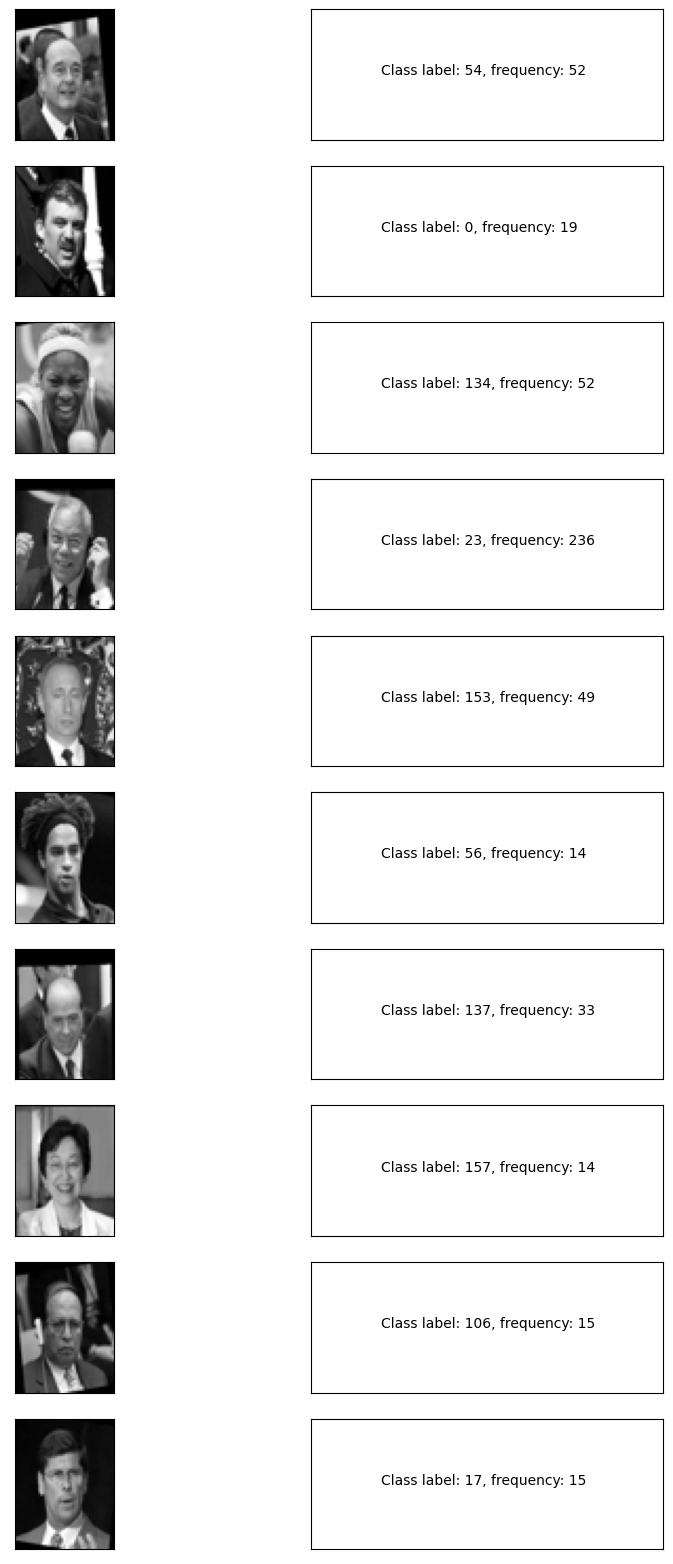

In [8]:

# récupérer les dix premières images
images = lfw_people.images[:10]

# créer une figure avec des sous-tracés
fig, axs = plt.subplots(10, 2,figsize=(10, 20))


i = 0
# tracer chaque image
for i, class_label in enumerate(class_labels_10):
    axs[i, 0].imshow(images[i], cmap='gray')

    frequency = np.count_nonzero(all_class_labels == class_label)
    axs[i, 1].text(0.2, 0.5, f"Class label: {class_label}, frequency: {frequency}")
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)

# afficher le tracé
plt.show()

##### **1.4. Pour plus de stabilité, redimensionnons l'échelle de gris pour que les valeurs étaient comprises entre 0 et 1 au lieu d'utiliser l'échelle de valeurs de 0 à 255**

Pour redimensionner l'échelle de gris des images de la base de données "fetch_lfw_people" du package sklearn de sorte que les valeurs soient comprises entre 0 et 1, on peut utiliser la fonction scaling de scikit-learn comme suit:

In [18]:
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import scale

# importer la base de données
lfw_people = fetch_lfw_people(min_faces_per_person=10)

# obtenir les données des images et les stocker dans une variable
X = lfw_people.data
print(lfw_people.data.shape)

# redimensionner l'échelle de gris pour que les valeurs soient comprises entre 0 et 1
X_scaled = scale(X, with_mean=True, with_std=True, copy=True)

(4324, 2914)


C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Cela devrait redimensionner l'échelle de gris des images de la base de données de sorte que les valeurs soient comprises entre 0 et 1. 
Note : on peut également utiliser la fonction MinMaxScaler de scikit-learn pour effectuer cette opération de manière plus efficace.

##### **1.5. A l'aide de KNeighborsClassifier créer un modèle pour classifier les images, et voyons à quel point le fonctionne.**

Pour créer un modèle de classification d'images en utilisant la méthode KNN (k-nearest neighbors) et la base de données "fetch_lfw_people" de sklearn, vous pouvez utiliser la classe sklearn.neighbors.KNeighborsClassifier de la bibliothèque scikit-learn. Cette classe implémente un modèle de classification supervisée basé sur l'algorithme KNN, qui utilise des données d'entraînement annotées pour prédire la classe d'un nouvel échantillon en utilisant l'ensemble des échantillons les plus proches dans l'espace des features.

Voici un exemple de comment utiliser la classe KNeighborsClassifier avec la base de données "fetch_lfw_people" pour créer un modèle de classification d'images :

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# obtenir les étiquettes de classe
y = lfw_people.target
# Nous utilisons les données scallées X_scaled

# diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# créer un classifieur KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)

# entraîner le modèle sur l'ensemble d'entraînement
knn_clf.fit(X_train, y_train)

# évaluer le modèle sur l'ensemble de test
accuracy = knn_clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.16647398843930636


Cela devrait entraîner un modèle KNN sur les données d'entraînement et l'évaluer sur les données de test. L'exactitude du modèle sera imprimée à l'aide de la fonction score. Vous pouvez également utiliser d'autres métriques d'évaluation pour mesurer la performance du modèle.

##### **1.7. Pour appliquer l'objet PCA (Analyse en Composantes Principales) sur les données d'entraînement et extraire les 100 premiers composants principaux, vous pouvez utiliser les instructions suivantes:**

Le PCA (Analyse en Composantes Principales) est une technique utilisée en apprentissage automatique pour réduire la dimensionnalité d'un ensemble de données. Elle consiste à trouver un nouvel ensemble de variables, appelées composantes principales, qui sont des combinaisons linéaires des variables initiales et qui expliquent la plus grande variance possible des données.

Le PCA permet de réduire la dimensionnalité d'un ensemble de données en conservant un maximum d'informations. Par exemple, si vous avez un ensemble de données avec 100 variables, le PCA pourrait vous permettre de représenter ces données en utilisant seulement 10 ou 20 variables tout en conservant la plus grande partie de la variance des données initiales.

In [11]:
from sklearn.decomposition import PCA

# créer un objet PCA et extraire les 100 premiers composants principaux
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)

Cela devrait créer un objet PCA et utiliser cet objet pour transformer les données d'entrée en un ensemble de données de 100 composants principaux. Vous pouvez ensuite utiliser les données transformées pour entraîner un modèle de classification ou pour d'autres tâches d'apprentissage automatique. N'oubliez pas de transformer également les données d'entraînement et de test en utilisant les composants principaux extraits des données d'entraînement.

##### **1.8. Vous pouvez maintenant utiliser le nouvel ensemble d'apprentissage pour classer les images en utilisant le classificateur Knn, dont k=1.**

In [12]:
X_test_pca = pca.transform(X_test)

# créer un classifieur KNN
knn_clf = KNeighborsClassifier(n_neighbors=20)

# entraîner le modèle sur l'ensemble d'entraînement
knn_clf.fit(X_train_pca, y_train)

# évaluer le modèle sur l'ensemble de test
accuracy = knn_clf.score(X_test_pca, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.1976878612716763


Cela devrait entraîner un modèle KNN sur les données transformées par PCA et l'évaluer sur les données de test. L'exactitude du modèle sera imprimée à l'aide de la fonction score. Vous pouvez également utiliser d'autres métriques d'évaluation pour mesurer la performance du modèle

##### **1.9. En analysant le résultat de l’utilisation de PCA Noter vos remarques.**

En utilisant PCA (Analyse en Composantes Principales) pour transformer les données d'entraînement avant de les utiliser pour entraîner un classificateur KNN, on pourra obtenir une performance de classification améliorée. Cela peut être dû au fait que PCA permet de réduire la dimensionnalité des données en ne conservant que les composants principaux, ce qui peut éliminer le bruit et les variables redondantes dans les données d'entraînement. Cela peut également accélérer l'entraînement du modèle et améliorer sa performance en général.

Toutefois, il est important de choisir le nombre de composants principaux à extraire en fonction des données et de la tâche de classification. Si vous choisissez un nombre trop élevé, peut etre qu'on perdra en précision en conservant des variables non pertinentes dans les données. Si nous choisissons un nombre trop faible, on pourra perdre en précision en éliminant des informations importantes dans les données. Il est donc important de trouver un compromis entre ces deux extrêmes pour obtenir une performance optimale.

##### **1.10. En analysant le résultat de l’utilisation de PCA Noter vos remarques.**

Shape of pca.components_: (100, 2914)


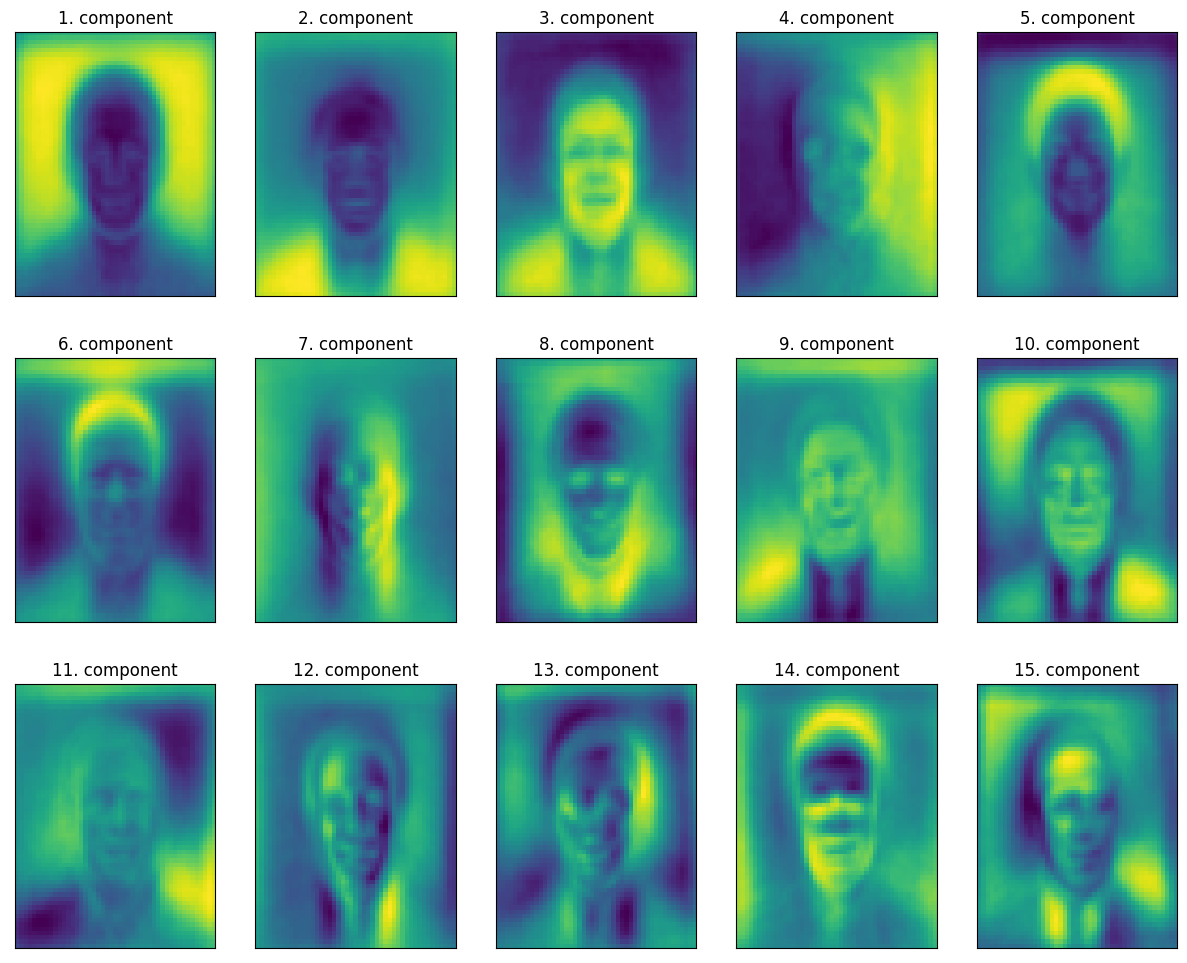

In [13]:
# obtenir les données des images et la forme des images
image_shape = lfw_people.images[0].shape

# afficher la forme des composants principaux
print("Shape of pca.components_:", pca.components_.shape)

# afficher les premiers composants principaux
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

plt.show()

Cela devrait afficher les premiers composants principaux extraits des données dans une figure de matplotlib. Ces composants sont des combinaisons linéaires des variables d'entrée (les pixels des images) qui ont été choisies pour capturer une grande partie de la variance des données d'entraînement. En examinant ces composants, on pourra obtenir une idée de quelles caractéristiques des images sont les plus importantes pour la classification des visages. Par exemple, certains composants peuvent mettre en évidence les contours du visage, tandis que d'autres peuvent mettre en évidence les détails des yeux ou de la bouche. Ces informations peuvent être utiles pour comprendre comment le modèle KNN effectue la classification des images.

##### **1.11. A l'aide de code ci-dessus visualisez les résultats de la reconstruction de certains visages utilisant 10, 50, 100, 500 et 2000 composants, et donner une analyse du résultat.**

(3459, 15)
(865, 15)
Accuracy: 0.16416184971098266
Shape of pca.components_: (15, 2914)
Variance 0.63556266


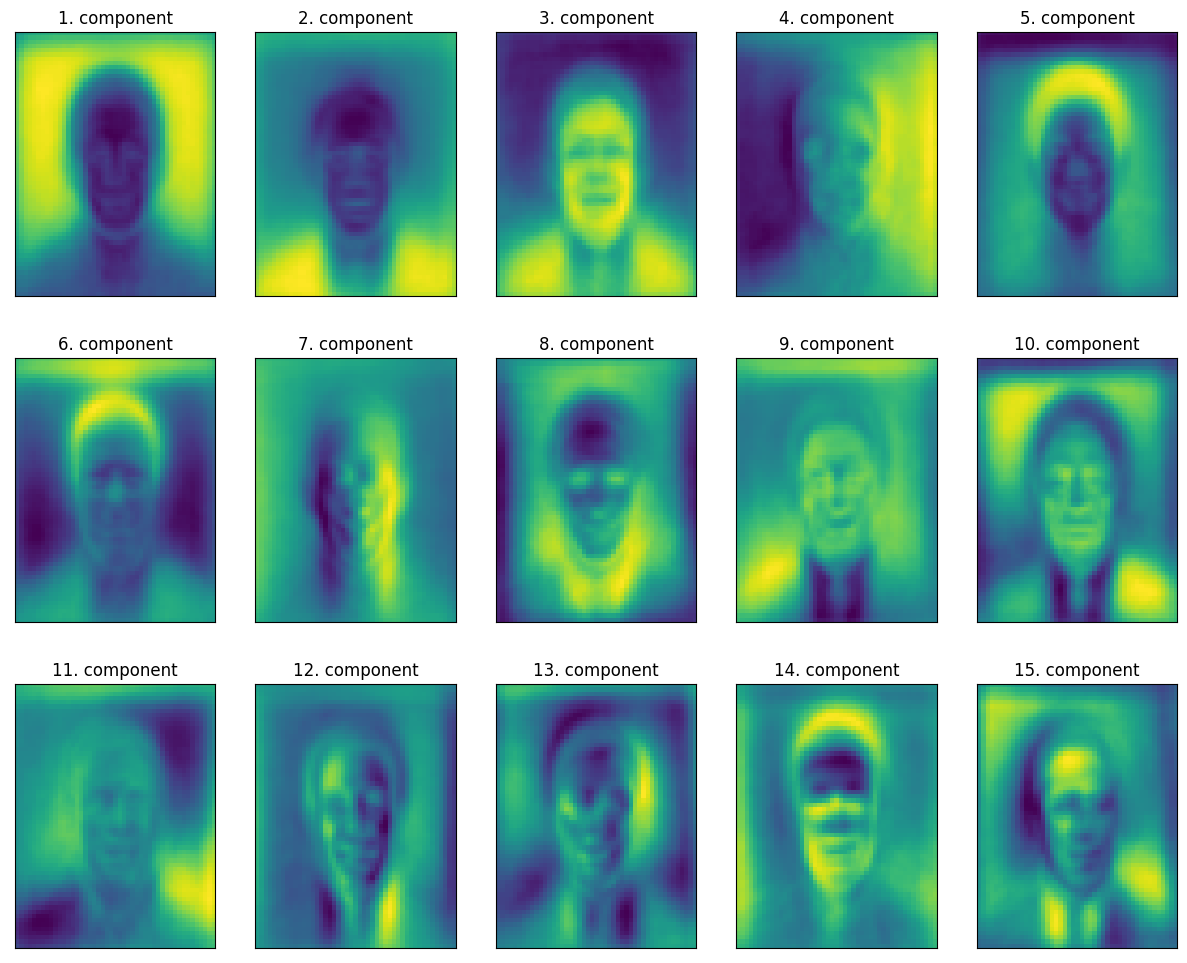

(3459, 50)
(865, 50)
Accuracy: 0.1861271676300578
Shape of pca.components_: (50, 2914)
Variance 0.7937262


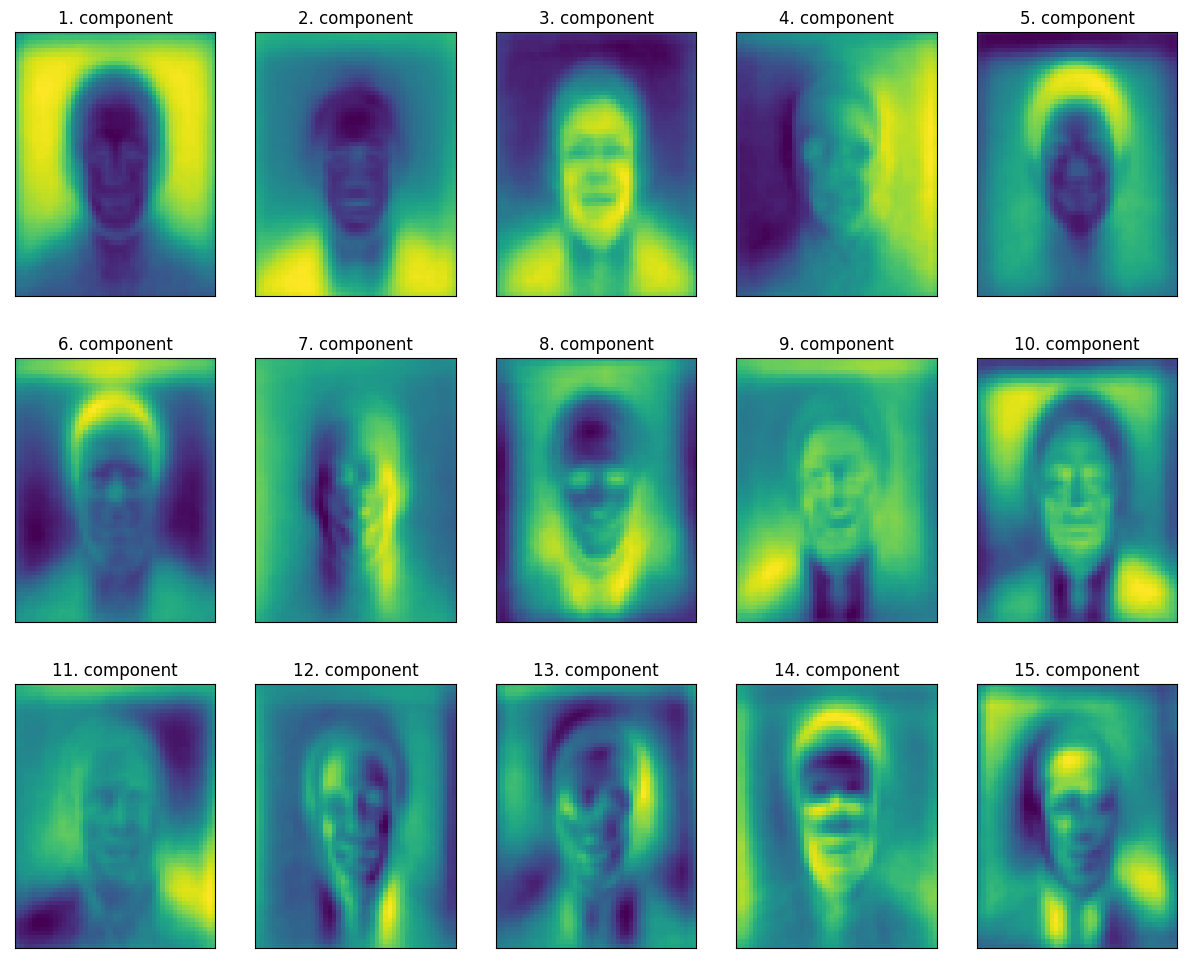

(3459, 100)
(865, 100)
Accuracy: 0.2046242774566474
Shape of pca.components_: (100, 2914)
Variance 0.86593485


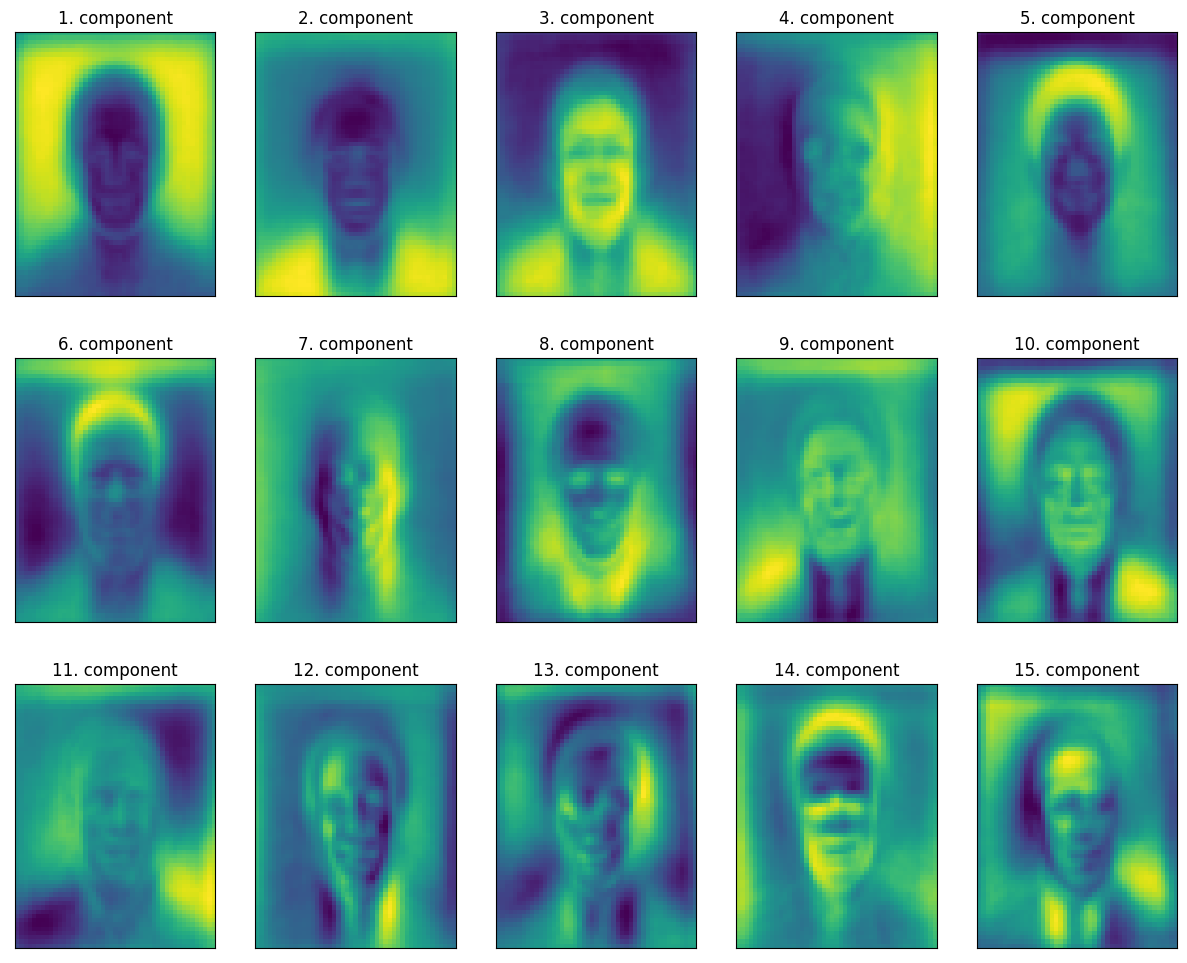

(3459, 500)
(865, 500)
Accuracy: 0.19421965317919074
Shape of pca.components_: (500, 2914)
Variance 0.97439307


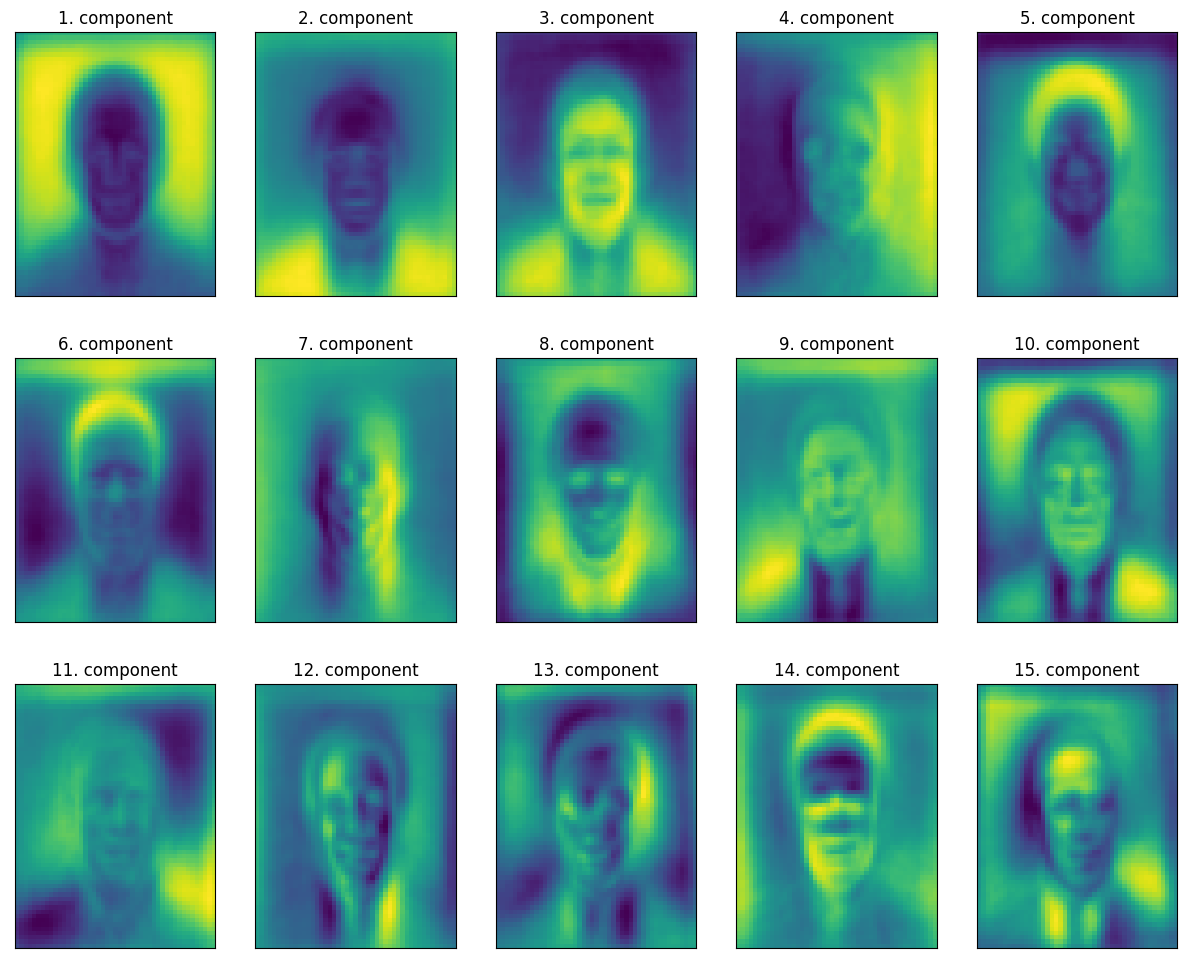

(3459, 2000)
(865, 2000)
Accuracy: 0.2
Shape of pca.components_: (2000, 2914)
Variance 0.9996654


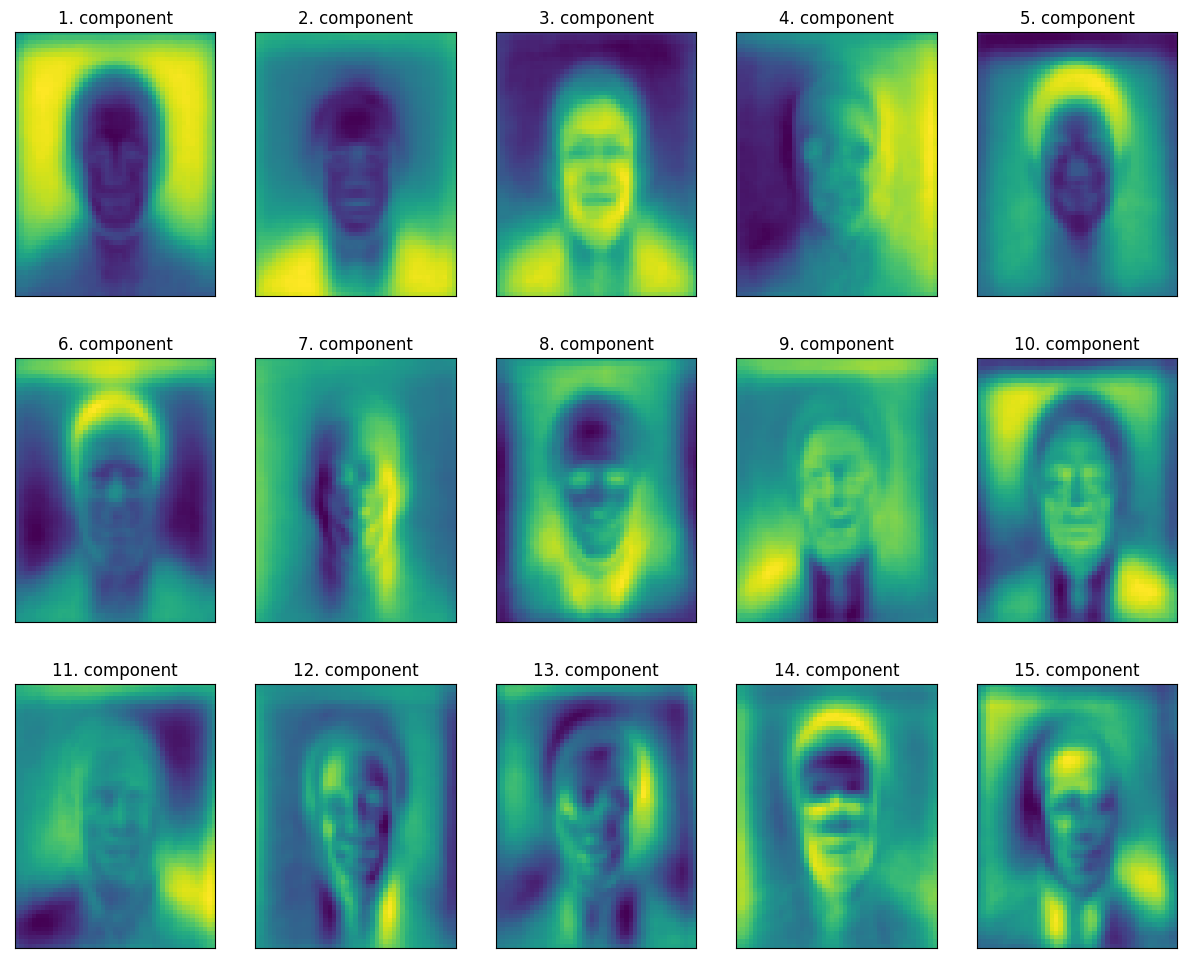

(3459, 2914)
(865, 2914)
Accuracy: 0.20115606936416186
Shape of pca.components_: (2914, 2914)
Variance 1.0000001


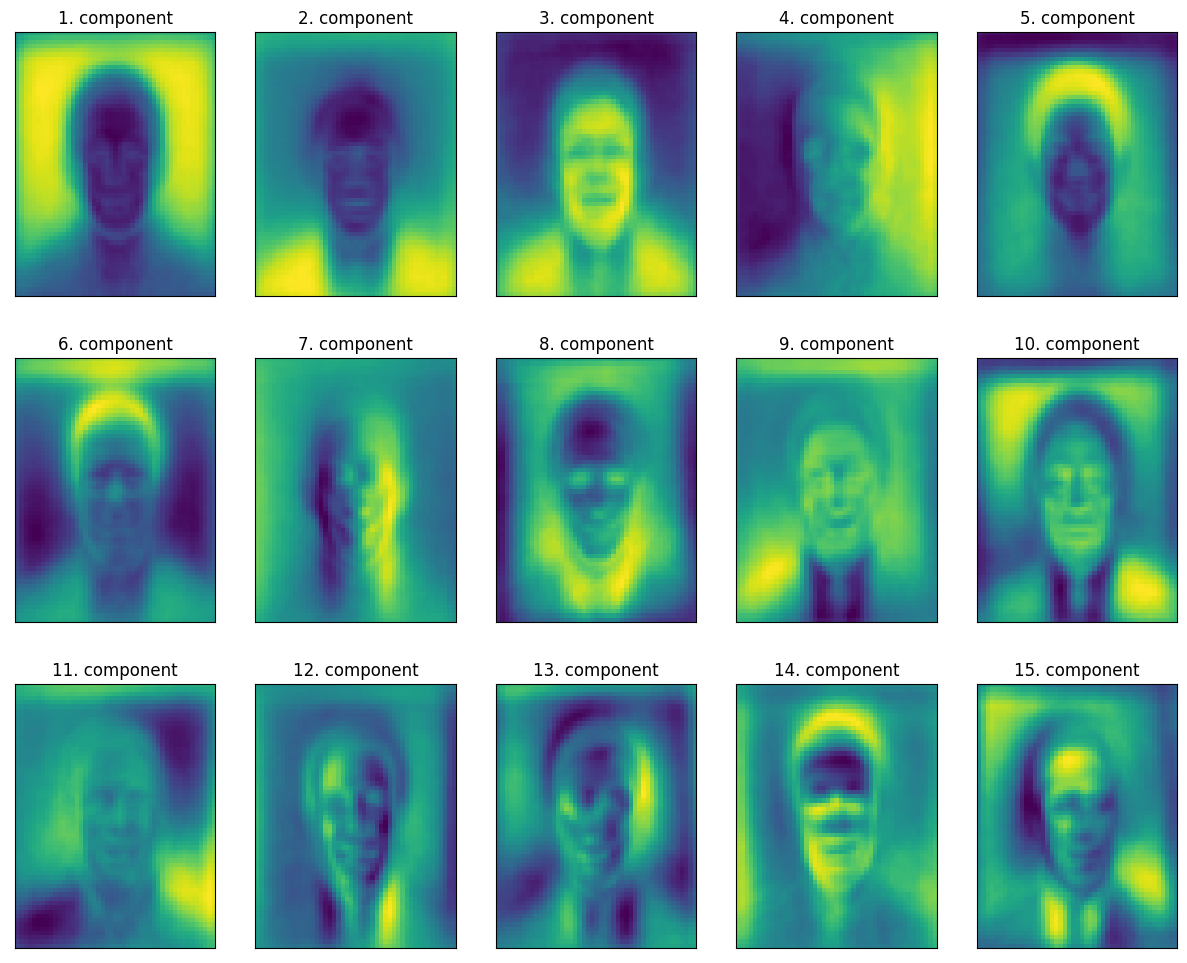

In [26]:
table = [15, 50, 100, 500, 2000, 2914]

for n_comp in table:
    pca = PCA(n_components=n_comp) 
    X_train_pca = pca.fit_transform(X_train)
    print(X_train_pca.shape)

    # créer un classifieur KNN
    knn_clf = KNeighborsClassifier(n_neighbors=20)

    # entraîner le modèle sur l'ensemble d'entraînement
    X_train_pca = knn_clf.fit(X_train_pca, y_train)

  
    X_test_pca = pca.transform(X_test)
    print(X_test_pca.shape)
    # évaluer le modèle sur l'ensemble de test
    accuracy = knn_clf.score(X_test_pca, y_test)
    print("Accuracy:", accuracy)

    # obtenir les données des images et la forme des images
    # afficher la forme des composants principaux
    print("Shape of pca.components_:", pca.components_.shape)
    
    # On affiche le pourcentage de variance expliquée par les deux premières composantes principales
    print("Variance "+str(pca.explained_variance_ratio_[:n_comp].sum()))

    # afficher les premiers composants principaux
    fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
        ax.imshow(component.reshape(image_shape), cmap='viridis')
        ax.set_title("{}. component".format((i + 1)))
    
    plt.show()


La variance expliquée par les composantes principales peut être un facteur utile pour choisir le nombre de composantes à conserver lors d'une analyse en composantes principales (PCA). En général, plus le pourcentage de variance expliqué par les composantes principales est élevé, plus les données sont bien représentées par ces composantes et moins de perte d'information se produit lors de la dimensionnalité réduite.

Cependant, il est important de noter que la variance expliquée n'est pas le seul facteur à prendre en compte lors du choix du nombre de composantes. D'autres facteurs tels que les objectifs de l'analyse, la qualité des données et les contraintes de temps et de mémoire peuvent également influencer ce choix.

En général la réduction de la dimensionnalité des données est une étape préalable à la classification, qui permet d'améliorer la performance du modèle de classification en évitant le surapprentissage.